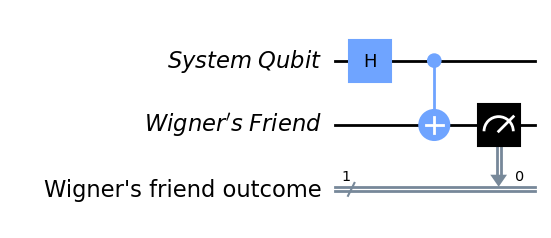

In [9]:
#This code demonstrates the thought experiment of Eugene Wigner about the 
#thoery of "Wigner's Friend"

"""
Wigner imagined that his friend has measured a quantum system in a superposition state
When she measures it, she sees only one outcome either 0 or 1.
"""

#The Code
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qr1 = QuantumRegister(1, name = "System Qubit")
qr2 = QuantumRegister(1, name = "Wigner's Friend")
cr1 = ClassicalRegister(1, name = "Wigner's friend outcome")

qc = QuantumCircuit(qr1, qr2, cr1)
qc.h(0)
qc.cx(0,1)
qc.measure(1,0)

qc.draw('mpl')

Wigner's friend counts =  {'0': 487, '1': 537}


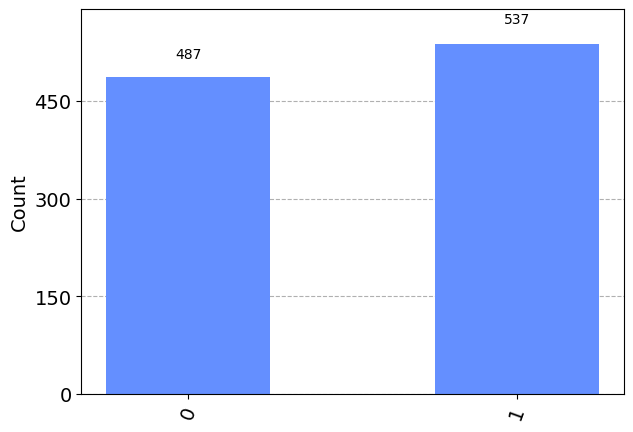

In [10]:
#Running the circuit

from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

backend = AerSimulator()
result = backend.run(qc).result()

print("Wigner's friend counts = ", result.get_counts())

plot_histogram(result.get_counts())

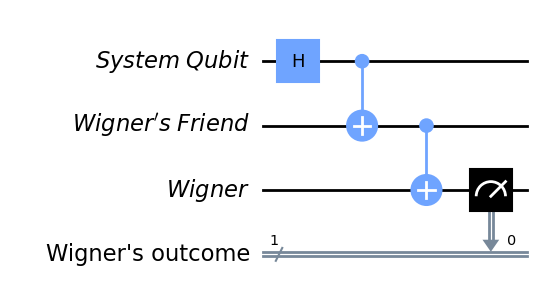

In [12]:
"""
Suppose now Wigner is completely isolated from his friend, and don't know about
the declaration. So from Wigner's perspective the qubits are still in superpostion.
So Wigner then asks his friend and later find out about the what the state 
the qubit in and then declares the result.

The Steps:
1. Introduce Qubit for Wigner's memory
2. CNOT gate to entangle Wigner's memory and friend's memory qubits
3. We need a irreversible measurement operation on Wigner's memory qubit
"""
qr3 = QuantumRegister(1, name = "Wigner")
cr2 = ClassicalRegister(1, name = "Wigner's outcome")

qc2 = QuantumCircuit(qr1, qr2, qr3, cr2)
qc2.h(0)
qc2.cx(0,1)
qc2.cx(1,2)

qc2.measure(2,0)

qc2.draw('mpl')


In [ ]:
#Running the circuit

result  = backend.run(qc2).result()

print("Wigner's counts: ", result.get_counts())

plot_histogram(result.get_counts())